<a href="https://colab.research.google.com/github/angel-calderon-1321/OpticaLab/blob/main/Medici%C3%B3n_del_indice_de_refracci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Craga de Datos

In [ ]:
theta = [1, 2, 3, 4, 5, 6, 7, 8, 9] #grados de incidencia
m = [4, 9.5, 16.5, 25.5, 35.5, 47, 60, 81, 104.5] #numeros de franjas

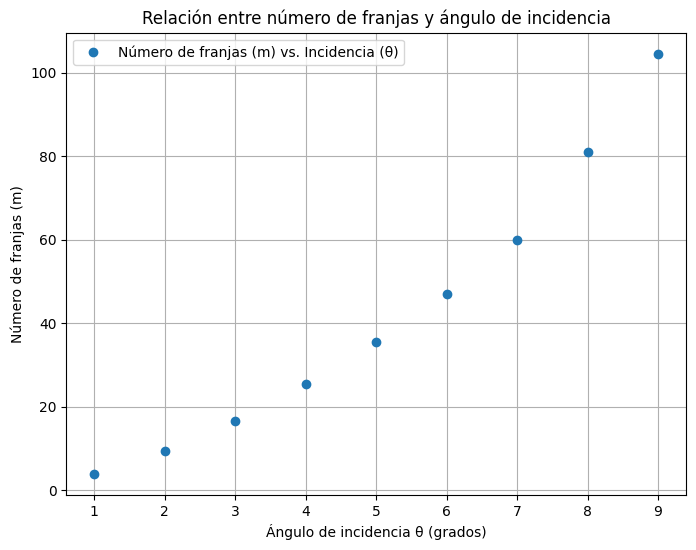

In [29]:
# Graficamos los datos
plt.figure(figsize=(8, 6))
plt.plot(theta, m, 'o', label='Número de franjas (m) vs. Incidencia (θ)')
plt.xlabel('Ángulo de incidencia θ (grados)')
plt.ylabel('Número de franjas (m)')
plt.title('Relación entre número de franjas y ángulo de incidencia')
plt.grid(True)
plt.legend()
plt.show()


## Ajuste de Datos

Índice de refracción ajustado: 1.5004
R^2 del ajuste: 0.9893


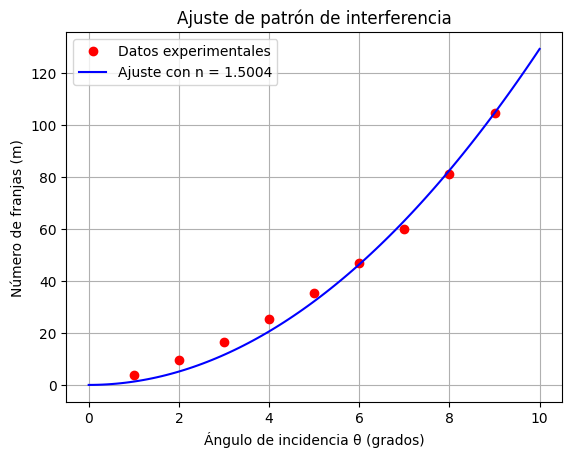

In [59]:
# Datos experimentales
theta_deg = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # grados de incidencia
theta_rad = np.radians(theta_deg)  # convertir a radianes
m = np.array([4, 9.5, 16.5, 25.5, 35.5, 47, 60, 81, 104.5])  # números de franjas

# Parámetros fijos
d = 0.008  # espesor de la placa de vidrio (en metros)
lambda_0 = 632.8e-9  # longitud de onda (en metros)

# Función para ajustar, con n como parámetro
def fringe_pattern(theta_i, n):
    sin_theta_r = np.sin(theta_i) / n
    theta_r = np.arcsin(sin_theta_r)
    term1 = 1 / np.cos(theta_r) - 1
    term2 = (np.cos(theta_i - theta_r)) / np.cos(theta_r)
    m = (2 * d / lambda_0) * (n * term1 + 1 - term2)
    return m

# Ajuste de curva
popt, pcov = curve_fit(fringe_pattern, theta_rad, m, p0=[1.5])  # p0 suposición inicial para n

# Parámetros ajustados y su error
n_opt = popt[0]
n_error = np.sqrt(np.diag(pcov))[0]

# Predicciones del modelo ajustado
m_pred = fringe_pattern(theta_rad, n_opt)

# Cálculo de R^2
residuals = m - m_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((m - np.mean(m))**2)
r_squared = 1 - (ss_res / ss_tot)

# Mostrar los resultados
print(f"Índice de refracción ajustado: {n_opt:.4f}")
print(f"R^2 del ajuste: {r_squared:.4f}")

# Graficar los datos experimentales y la curva ajustada
theta_fine = np.linspace(0, np.radians(10), 100)  # más puntos para la curva ajustada
m_fitted = fringe_pattern(theta_fine, n_opt)

plt.plot(theta_deg, m, 'ro', label='Datos experimentales')
plt.plot(np.degrees(theta_fine), m_fitted, 'b-', label=f'Ajuste con n = {n_opt:.4f}')
plt.xlabel('Ángulo de incidencia θ (grados)')
plt.ylabel('Número de franjas (m)')
plt.title('Ajuste de patrón de interferencia')
plt.legend()
plt.grid(True)
plt.show()


## Cálculo de errores

In [38]:
# Función para ajustar, con n como parámetro
def fringe_pattern(theta_i, n, d):
    sin_theta_r = np.sin(theta_i) / n
    theta_r = np.arcsin(sin_theta_r)
    term1 = 1 / np.cos(theta_r) - 1
    term2 = (np.cos(theta_i - theta_r)) / np.cos(theta_r)
    m = (2 * d / lambda_0) * (n * term1 + 1 - term2)
    return m

# Parámetros fijos
lambda_0 = 632.8e-9  # longitud de onda en metros
d_medido = 0.008  # espesor en metros
error_d = 0.0002   # error de apreciación del espesor

theta_deg = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # grados de incidencia
theta_rad = np.radians(theta_deg)  # convertir a radianes
m = np.array([4, 9.5, 16.5, 25.5, 35.5, 47, 60, 81, 104.5])  # número de franjas

# Ajuste principal
popt, pcov = curve_fit(lambda theta_i, n: fringe_pattern(theta_i, n, d_medido), theta_rad, m, p0=[1.5])
n_opt = popt[0]

# Calcular el error en n debido a la incertidumbre en d
n_plus_d = curve_fit(lambda theta_i, n: fringe_pattern(theta_i, n, d_medido + error_d), theta_rad, m, p0=[1.5])[0][0]
n_minus_d = curve_fit(lambda theta_i, n: fringe_pattern(theta_i, n, d_medido - error_d), theta_rad, m, p0=[1.5])[0][0]
delta_n_d = (n_plus_d - n_minus_d) / 2

# Calcular el error en n debido a la incertidumbre en theta
delta_theta = np.radians(1)  # error de apreciación angular
n_plus_theta = curve_fit(lambda theta_i, n: fringe_pattern(theta_i + delta_theta, n, d_medido), theta_rad, m, p0=[1.5])[0][0]
n_minus_theta = curve_fit(lambda theta_i, n: fringe_pattern(theta_i - delta_theta, n, d_medido), theta_rad, m, p0=[1.5])[0][0]
delta_n_theta = (n_plus_theta - n_minus_theta) / 2

# Error de medición en el número de franjas (m)
error_m = 0.5  # Dado que la apreciación era de 0.5 franjas

# Calcular el error en n debido a la incertidumbre en m
m_plus = np.array(m) + error_m
m_minus = np.array(m) - error_m

n_plus_m = curve_fit(lambda theta_i, n: fringe_pattern(theta_i, n, d_medido), theta_rad, m_plus, p0=[1.5])[0][0]
n_minus_m = curve_fit(lambda theta_i, n: fringe_pattern(theta_i, n, d_medido), theta_rad, m_minus, p0=[1.5])[0][0]
delta_n_m = (n_plus_m - n_minus_m) / 2

# Ahora puedes calcular el error total usando la fórmula de propagación de errores
error_total_n = np.sqrt(delta_n_d**2 + delta_n_theta**2 + delta_n_m**2)

# Error total en n por propagación de incertidumbre
#error_total_n = np.sqrt(delta_n_d**2 + delta_n_theta**2)

print(f"Índice de refracción ajustado: {n_opt:.4f} ± {error_total_n:.4f}")


Índice de refracción ajustado: 1.5004 ± 0.2174
